In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from copy import deepcopy
from datetime import datetime
start_time = datetime.now()

In [4]:
data = pd.read_csv('applications data.csv',index_col = 0)
data.head()

,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
record,,,,,,,,,
1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [5]:
print("Rows     : ", data.shape[0])
print("Columns  : ", data.shape[1])
print("\nFeatures : \n", data.columns.tolist())
print("\nMissing values : \n" , data.isnull().sum())
print("\nUnique values   : ", data.nunique())

Rows     :  1000000
Columns  :  9

Features : 
 ['date', 'ssn', 'firstname', 'lastname', 'address', 'zip5', 'dob', 'homephone', 'fraud_label']

Missing values : 
 date           0
ssn            0
firstname      0
lastname       0
address        0
zip5           0
dob            0
homephone      0
fraud_label    0
dtype: int64

Unique values   :  date              365
ssn            835819
firstname       78136
lastname       177001
address        828774
zip5            26370
dob             42673
homephone       28244
fraud_label         2
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 1 to 1000000
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   date         1000000 non-null  int64 
 1   ssn          1000000 non-null  int64 
 2   firstname    1000000 non-null  object
 3   lastname     1000000 non-null  object
 4   address      1000000 non-null  object
 5   zip5         1000000 non-null  int64 
 6   dob          1000000 non-null  int64 
 7   homephone    1000000 non-null  int64 
 8   fraud_label  1000000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 76.3+ MB


In [7]:
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [8]:
columns = data.columns.values

In [9]:
summ_cat = pd.DataFrame(index = columns)
summ_cat['Data Type'] = data.dtypes.values
summ_cat['# Nonnull records'] = data.count().values
summ_cat['% Populated'] = round(summ_cat['# Nonnull records']/data.shape[0]*100,2)
summ_cat['# Unique values'] = data.nunique().values

In [10]:
temp = []
for col in columns:
    temp.append(data[col].value_counts().idxmax())
summ_cat['Most common value'] = temp

In [11]:
summ_cat

,Data Type,# Nonnull records,% Populated,# Unique values,Most common value
date,int64,1000000,100.00,365,20160816
ssn,int64,1000000,100.00,835819,999999999
firstname,object,1000000,100.00,78136,EAMSTRMT
lastname,object,1000000,100.00,177001,ERJSAXA
address,object,1000000,100.00,828774,123 MAIN ST
zip5,int64,1000000,100.00,26370,68138
dob,int64,1000000,100.00,42673,19070626
homephone,int64,1000000,100.00,28244,9999999999
fraud_label,int64,1000000,100.00,2,0


Field 1: date \
Description:  A categorical field containing the Social Security Number of each
applicant.

In [18]:
Date = data['date'].value_counts().rename_axis('Unique_values_Date').reset_index(name='Counts')
Date[:15]

,Unique_values_Date,Counts
0,20160816,2877
1,20160304,2861
2,20160718,2849
3,20160417,2848
4,20160101,2840
5,20161228,2832
6,20160903,2832
7,20160808,2832
8,20160827,2831
9,20160609,2831


Field 2: ssn \
Description: A categorical field containing the Social Security Number of each applicant.

In [19]:
SSN = data['ssn'].value_counts().rename_axis('Unique_values_ssn').reset_index(name='Counts')
SSN[:15]

,Unique_values_ssn,Counts
0,999999999,16935
1,938972725,114
2,810776805,81
3,829352390,74
4,473311863,44
5,165764866,34
6,189622157,30
7,295308935,30
8,588726212,29
9,163830210,29


Field 3: firstname \
Description: A categorical field containing the first name of each applicant.

In [22]:
First_name = data['firstname'].value_counts().rename_axis('Unique_values_First_name').reset_index(name='Counts')
First_name[:15]

,Unique_values_First_name,Counts
0,EAMSTRMT,12658
1,TXEMXZZM,10297
2,UXXJJZTUZ,10235
3,UJSRSMUEZ,9994
4,SREZUJMJU,9688
5,EASEXMJAT,7576
6,SSSXUEJMS,6923
7,SZUASTTA,6878
8,EREMTZXXA,6717
9,EAXRRUMUX,5686


Field 4: lastname \
Description: A categorical field containing the last name of each applicant.

In [23]:
Last_name = data['lastname'].value_counts().rename_axis('Unique_values_Last_name').reset_index(name='Counts')
Last_name[:15]

,Unique_values_Last_name,Counts
0,ERJSAXA,8580
1,UMXUUUSE,7156
2,UMARRMA,6832
3,MEAXJUX,5492
4,XMERRR,5451
5,SXZXJRJT,4340
6,EUSEZRAE,4173
7,USMATTUR,4036
8,ETERUXME,3762
9,RJURSTXJ,3575


Field 5: address \
Description:  A categorical field containing the address of each applicant.

In [26]:
Address = data['address'].value_counts().rename_axis('Unique_values_Address').reset_index(name='Counts')
Address[:15]

,Unique_values_Address,Counts
0,123 MAIN ST,1079
1,1775 XJXE LN,97
2,7433 RAEZA ST,80
3,8911 MZSU DR,74
4,4907 RRAAU DR,73
5,426 XUAXZ BLVD,57
6,3545 ARMA ST,44
7,606 EZZAU WY,44
8,4530 ETSMX WY,42
9,4292 RUSMM LN,41


Field 6: zip \
Description: A categorical field containing all the five digits of the ZIP code.

In [27]:
Zip = data['zip5'].value_counts().rename_axis('Unique_values_Zip').reset_index(name='Counts')
Zip[:15]


,Unique_values_Zip,Counts
0,68138,823
1,90042,514
2,89835,489
3,35227,478
4,14931,459
5,86500,438
6,12700,436
7,1362,434
8,59695,432
9,52317,432


Field 7: dob \
Description: A categorical field containing the date of birth of each applicant.

In [28]:
Dob = data['dob'].value_counts().rename_axis('Unique_values_Dob').reset_index(name='Counts')
Dob[:15]

,Unique_values_Dob,Counts
0,19070626,126568
1,19640318,4818
2,19760625,3723
3,19880628,1404
4,19740216,980
5,20090127,280
6,19460901,135
7,19591208,126
8,19280611,120
9,19670215,102


Field 8: homephone \
Description:  A categorical field containing the home phone number of applicants.

In [29]:
Homephone = data['homephone'].value_counts().rename_axis('Unique_values_Homephone').reset_index(name='Counts')
Homephone[:15]

,Unique_values_Homephone,Counts
0,9999999999,78512
1,6384782007,466
2,6035129044,360
3,2113738531,331
4,4024680535,198
5,2669445638,172
6,6637507363,169
7,8629049955,139
8,3364980740,110
9,1324008228,108


Field 9: fraud_label \
Description: A categorical field indicating if an application is fraud:\
0 – Good application\
1 – Bad application

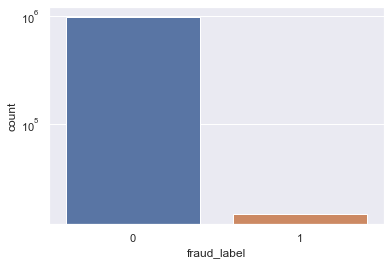

In [31]:
sns.set_theme(style = 'darkgrid')
fig1 = sns.countplot(x = 'fraud_label',data = data, order = data['fraud_label'].value_counts().index)
fig1.set_yscale('log')